![example](images/double-decker-2795557.jpg)

# Analysis of Low Risk Airplane Models

**Authors:** Will Bennett, James-Lee
***

## Overview

Our hypothetical company is expanding in to new industries to diversify its portfolio. Specifically, they are interested in purchasing and operating airplanes for commercial and private enterprises, but do not know anything about the potential risks of aircraft. We are using a dataset of 90k airplane accidents from 1948 to 2022 to identify the lowest risk aircraft.

## Business Problem

We are trying to identify the lowest risk aircraft for both commercial and private airplanes. The business doesn't likely will also care about cost to purchase the aircraft as well as the reputation & popularity of the aircraft. Thus we will identify some low risk aircraft among the most popular models.

## Data Understanding

The dataset for this model comes from the National Transportation Safety Board and includes aviation accident data from 1962 to 2023 about civil aviation accidents and selected incidents in the United States and international waters.

This data only represents airplanes involved in accidents, it does not represent flight hours. Common industry standard safetly metrics include:
- Accident rate: Accidents / 100k flight hours
- Fatality rate: Fatalities / 100k flight hours

Both these metrics include active safety, we will focus in on passive safety.
- Active safety includes all the features of an aircraft that helps the pilot avoid an accident
- Passive safetly includes all the features of an aircraft that protects the passenger upon an accident


This dataset cannot measure those since it only has accident data, thus we will create a metric for (passive safety):
- Fatality rate: Fatalities / Number of Passengers

For categorical variables we will focus on make and model

In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# here you run your code to clean the data
import code_package.data_preparation as dp

In [3]:
# Import the cleaned data
df = dp.full_clean("data/Aviation_Data.csv","data/Aviation_Data_Cleaned.csv")
df

/Users/willbennett/anaconda3/envs/learn-env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3337: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
/Users/willbennett/Documents/Flatiron/Course Materials/phase_1/phase1-project/code_package/data_preparation.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aviation_data_cleaned[top_makes_filter]['make'] = aviation_data_cleaned['make'].map(top_makes_map)


,event_date,location,airport_code,airport_name,injury_severity,aircraft_damage,make,model,number_of_engines,engine_type,...,weather_condition,broad_phase_of_flight,top_make,use_category,top_model,passenger_count,city,state,fatality_rate,percent_uninjured
7,1982-01-01,"PULLMAN, WA",Unknown,BLACKBURN AG STRIP,Non-Fatal,Substantial,Cessna,140,1.0,Reciprocating,...,Visual Meteorological Conditions,Takeoff,True,Private,False,2.0,Pullman,WA,0.0,1.0
8,1982-01-01,"EAST HANOVER, NJ",N58,HANOVER,Non-Fatal,Substantial,Cessna,401B,2.0,Reciprocating,...,Instrument Meteorological Conditions,Landing,True,Private,False,2.0,East hanover,NJ,0.0,1.0
9,1982-01-01,"JACKSONVILLE, FL",JAX,JACKSONVILLE INTL,Non-Fatal,Substantial,North American,NAVIONL17B,1.0,Reciprocating,...,Instrument Meteorological Conditions,Cruise,False,Unknown,False,3.0,Jacksonville,FL,0.0,0.0
10,1982-01-01,"HOBBS, NM",Unknown,Unknown,Non-Fatal,Substantial,Piper,PA28,1.0,Reciprocating,...,Visual Meteorological Conditions,Approach,True,Private,True,1.0,Hobbs,NM,0.0,1.0
11,1982-01-01,"TUSKEGEE, AL",Unknown,TUSKEGEE,Non-Fatal,Substantial,Beech,V35B,1.0,Reciprocating,...,Visual Meteorological Conditions,Landing,True,Private,False,1.0,Tuskegee,AL,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90340,2022-12-21,"Auburn Hills, MI",Unknown,Unknown,Minor,Unknown,Cessna,172,1.0,Unknown,...,Unknown Meteorological Conditions,Unknown,True,Private,True,1.0,Auburn hills,MI,0.0,0.0
90341,2022-12-21,"Reserve, LA",Unknown,Unknown,Minor,Unknown,Grumman American Avn. Corp.,AA5B,1.0,Reciprocating,...,Unknown Meteorological Conditions,Unknown,False,Unknown,False,2.0,Reserve,LA,0.0,0.5
90343,2022-12-26,"Annapolis, MD",Unknown,Unknown,Minor,Unknown,Piper,PA28,1.0,Unknown,...,Unknown Meteorological Conditions,Unknown,True,Private,True,1.0,Annapolis,MD,0.0,0.0
90345,2022-12-26,"Payson, AZ",PAN,PAYSON,Non-Fatal,Substantial,American Champion Aircraft,8GCBC,1.0,Reciprocating,...,Visual Meteorological Conditions,Unknown,False,Unknown,False,1.0,Payson,AZ,0.0,1.0


In [4]:
# Import the visualization package
import code_package.visualizations as viz

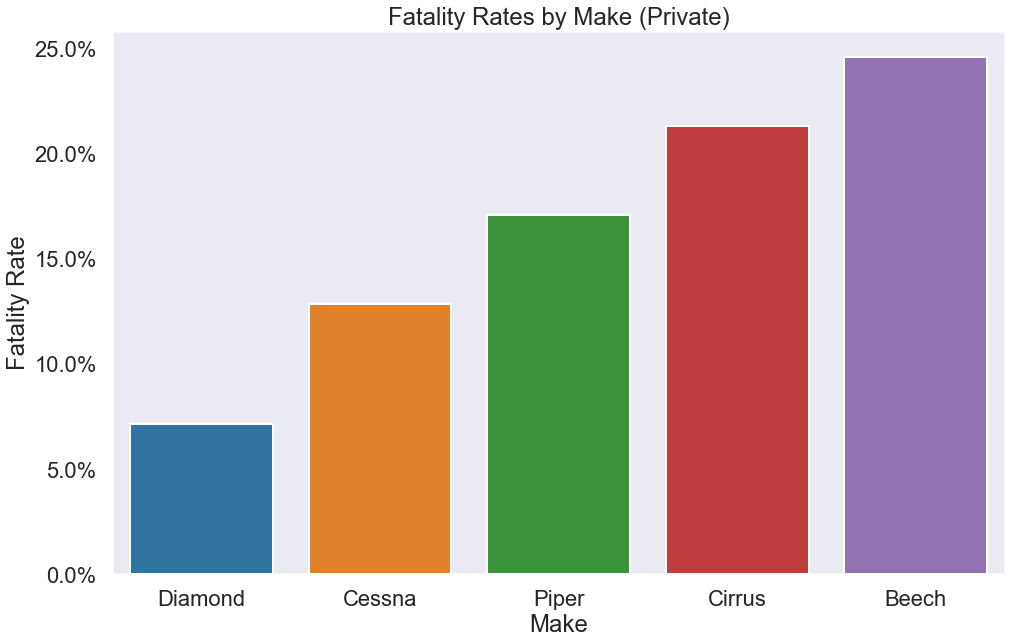

In [5]:
# Private Aircraft Makes Fatality Rates
viz.private_fatality_rates(df)

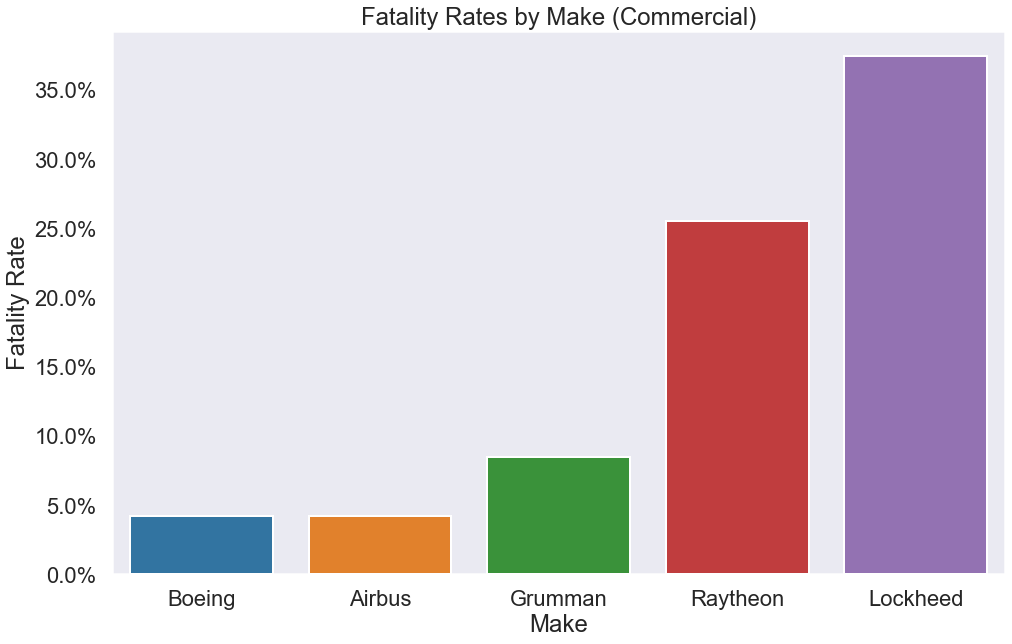

In [6]:
# Commercial Aircraft Makes Fatality Rates
viz.commercial_fatality_rates(df)

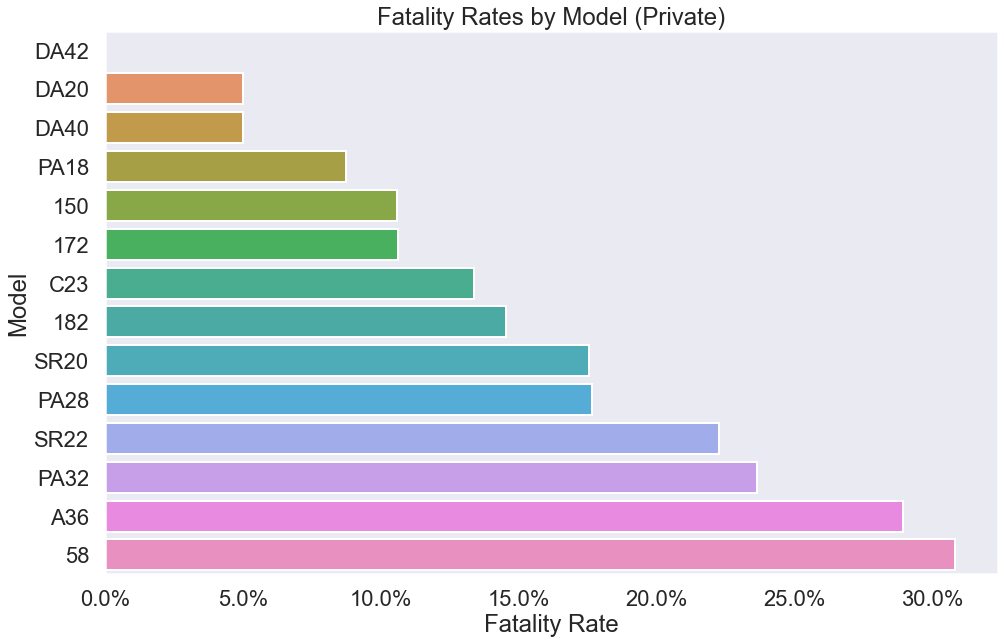

In [7]:
# Private Aircraft Models Fatality Rates
viz.private_models_fatality_rates(df)

## Data Preparation

**To prepare the data we had to:**
- Clean up column names
- Drop duplicates
- Clean up make & model columns
- Separate out city and state and clean state column
- Add columns to identify Commercial vs. Private Airplanes
- Add columns to identify top makes and models
- Add a column to count the total number of passengers (uninjured + injured)
- Clean the injury_severity column to combine like values
- Calculate fatality rates
- Calculate uninjured percent
- Change the date to datetime

**Data that was dropped:**
- Accidents not in the USA because we wanted to focus on the single market
- Accidents before 1982 because there weren't many
- Accidents from amateur made planes because the company would have their planes made professionally
- Accidents categorized as incidents were dropped because there is no chance of fatalities

**Handling missing data**
- We dropped missing location data because there was only 10
- We replaced missing airport codes and names with unknown since there were 30k rows with missing data
- Injury & uninjured counts:
 - Replace missing injury records with 0 since most seem to be 0
 - Replace missing uninjured counts with the median since we don't know the number of passengers
- Other categorical data had missing replaced with unknown
 - aircraft_damage
 - make
 - model
 - purpose_of_flight
 - weather_condition
 - broad_phase_of_flight
- For number of engines we:
 - Created a map based on all existing data on makes and models that had data
 - Mapped that to the missing data
 - Dropped the remainder (543) since it was a small subset
- For engine type we:
 - Created a map based on existing makes and models that had data
 - Mapped that to the missing data columns
 - Filled the rest with "Unknown" since it is categorical and there were 743

In [8]:
# Check out the information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70422 entries, 7 to 90347
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   event_date              70422 non-null  datetime64[ns]
 1   location                70422 non-null  object        
 2   airport_code            70422 non-null  object        
 3   airport_name            70422 non-null  object        
 4   injury_severity         70422 non-null  object        
 5   aircraft_damage         70422 non-null  object        
 6   make                    70422 non-null  object        
 7   model                   70422 non-null  object        
 8   number_of_engines       70422 non-null  float64       
 9   engine_type             70422 non-null  object        
 10  purpose_of_flight       70422 non-null  object        
 11  total_fatal_injuries    70422 non-null  float64       
 12  total_serious_injuries  70422 non-null  float6

In [9]:
# Confirm there are no missing data
df.isna().sum()

event_date                 0
location                   0
airport_code               0
airport_name               0
injury_severity            0
aircraft_damage            0
make                       0
model                      0
number_of_engines          0
engine_type                0
purpose_of_flight          0
total_fatal_injuries       0
total_serious_injuries     0
total_minor_injuries       0
total_uninjured            0
weather_condition          0
broad_phase_of_flight      0
top_make                   0
use_category               0
top_model                  0
passenger_count            0
city                       0
state                      0
fatality_rate             20
percent_uninjured         20
dtype: int64

In [10]:
# Describe the numerical data
df.describe()

,number_of_engines,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,passenger_count,fatality_rate,percent_uninjured
count,70422.000000,70422.000000,70422.000000,70422.000000,70422.000000,70422.000000,70402.000000,70402.000000
mean,1.112167,0.373591,0.224064,0.294610,2.764307,3.656570,0.150341,0.624259
std,0.408564,2.414545,1.076737,1.245903,16.498643,17.055426,0.339918,0.455954
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,1.000000
max,8.000000,265.000000,137.000000,125.000000,699.000000,699.000000,1.000000,1.000000


## Data Modeling
How we modeled the data:
- Looked for correlations between fatality rate and other numerical data points
- Comparied fatality rates for top private & commercial makes and models
- We looked at trends over time
- We explored various methods of visualizing the data
- We explored counts of metric data to determine what they meant (aka number of accidents)

Some things we noticed:
- There wasn't enough accident data on commercial models to make good comparisons
- Over time data didn't tell us anything model specific because it was too messy
- Looking at total accidents didn't tell us anything but it did help us easily identify popular models
- There was a lot of messy categorical data that wasn't that useful:


In [21]:
# Creating our key metric example:
# Create a column call fatality rate to figure out the deadliness of the accident
fatality_rate['fatality_rate'] = df['total_fatal_injuries']/df['passenger_count']
fatality_rate['fatality_rate'].value_counts().reset_index().head(10)

,index,0
0,0.000000,57963
1,1.000000,8553
2,0.500000,1757
3,0.666667,725
4,0.333333,399
5,0.750000,267
6,0.250000,152
7,0.800000,131
8,0.200000,76
9,0.400000,58


## Evaluation
Our work is useful for determining passive safety. Which was hard to find useful results via traditional research. Our model would generally work well for all aircraft. 

**Areas of Improvement**
Make and model were difficult to clean. Our cleaning method was sufficient for a one-time analysis, however a more sophisticated cleaning method would result in a more repeatable output.

## Conclusions
Private model recommendations:
- Diamond (20, 40, 42)
- Cessna 172
- Piper PA28 Series

Commercial model recommendations:
- Boeing (737 & 747)
- Airbus A320

Further steps to improve business recommendations:
- Analyze flight data to calculate activate safety metrics for models
- Analyze cost data to calculate risk from an investment standpoint
 - Money lost from Crashes / Money Invested
 - If a large aircraft crashes that’s a much larger loss than a small aircraft
 
Project improvements:
- Improved cleaning method for makes and models
